In [45]:
import numpy as np
import matplotlib.pyplot as plt
print("imported")

imported


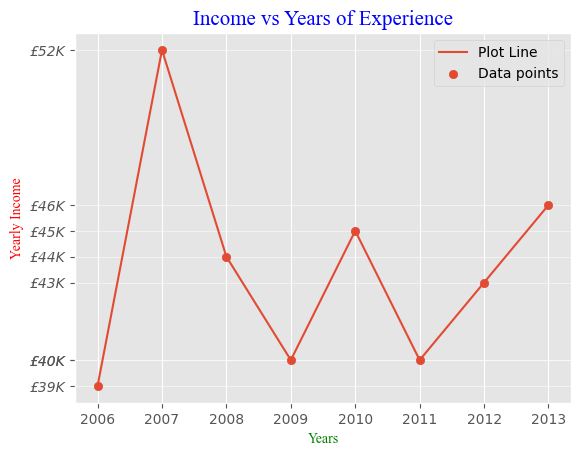

In [46]:
import numpy as np
from matplotlib import style

style.use("ggplot")

years= [x for x in range(2006,2014,1)]
income_in_pounds = [np.random.randint(34, 55) for _ in range(8)]

plt.plot(years,income_in_pounds, label = "Plot Line")
plt.scatter(years,income_in_pounds, label = "Data points")
plt.yticks(income_in_pounds,[f"£{y}K" for y in income_in_pounds], fontstyle ="italic")
plt.ylabel ("Yearly Income", c="r", size=10, fontname="Times New Roman")
plt.grid("False",axis="y", alpha= 0.5)
plt.xlabel ("Years", c="g", size=10, fontname="Times New Roman")
plt.title ("Income vs Years of Experience", c="b", size=15, fontname="Times New Roman")
plt.legend()


In [ ]:
import pandas as pd

data = pd.read_csv(r"C:\Users\sorin.creanga\Desktop\Visualisations\urbanisation_csv.csv", index_col=0)
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\sorin.creanga\\Desktop\\Visualisations\\urbanisation.csv'

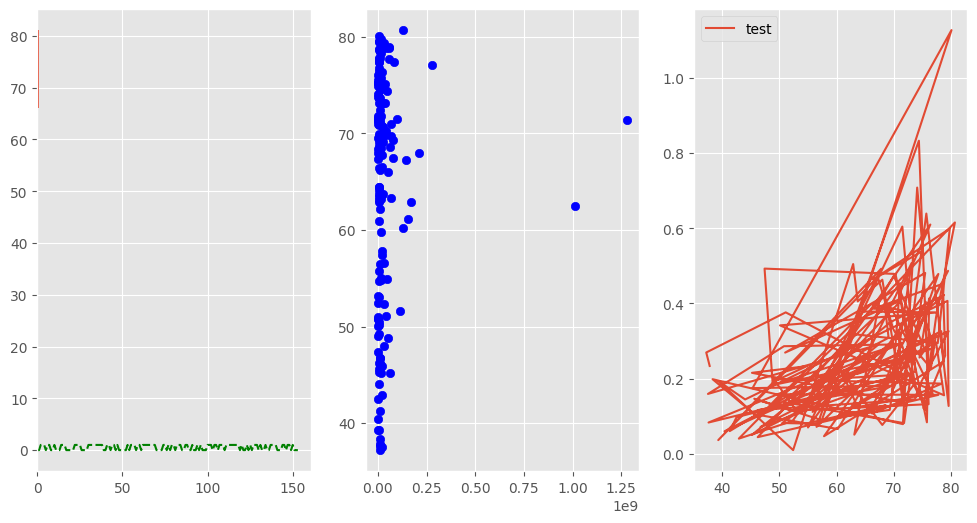

In [ ]:
population,life_expectancy,urbanization_rate,target_life_exp = data["Population"].tolist(),data["Lifeexpectancy"].tolist(), data["urbanization_rate"].tolist(), data["target_life_expectancy"].tolist()

fig, axes = plt.subplots(1,3, figsize=(12,6))

axes[1].scatter(population,life_expectancy, c="b", label = "points")
axes[2].plot(life_expectancy,urbanization_rate, label = "test")
axes[0].barh(life_expectancy, data["target_life_expectancy"].tolist())
axes[0].plot(target_life_exp, "g--")
plt.legend()
